### Libraries

In [1]:
# Determinadas
import numpy as np
import pandas
import matplotlib.pyplot as plt
import math

# Procesamiento de imágenes
import numpy as np
import cv2

### <br><br><br><br><br><br>Functions

In [2]:
def findPatches(img, patches, integral_img):  
    # Obtener la forma de la imagen.
    height, width = img.shape
    
    # Imagen parcheada.
    patch_img = img.copy()
    
    # Por cada parche.
    for patch in patches:
        # Obtener la forma del parche.
        patch_height, patch_width = patch.shape
        
        # Suma del parche.
        patch_sum = np.sum(patch)
        
        # Imagen de diferencias del parche.
        patch_sum_img = np.zeros_like(img, dtype="float32")
        
        for i in range(height):
            for j in range(width):
                if i+patch_height < height and j+patch_width < width:
                    # Extraer imagen.
                    extracted_img = img[i:i+patch_height, j:j+patch_width]
                    
                    # Variables para hacer la suma.
                    A = integral_img[i+patch_height,j+patch_width]
                    B = 0
                    C = 0
                    D = 0

                    # Validaciones de rangos.
                    if i-1 >= 0:
                        B = integral_img[i-1,j+patch_width]
                    if j-1 >= 0:
                        C = integral_img[i+patch_height,j-1]
                    if i-1 >= 0 and j-1 >= 0:
                        D = integral_img[i-1,j-1]

                    # Suma de la imagen extraída.
                    extracted_img_sum = A - B - C + D
                    
                    # Valor de la diferencia.
                    patch_sum_img[i,j] = abs(patch_sum - extracted_img_sum)
                    
                    if patch_sum_img[i,j] < 0.008:
                        patch_img[i:i+patch_height, j:j+patch_width] = patch

#         # Mostrar imagen.
#         plt.figure(figsize=(7,7))
#         plt.imshow(patch_img, cmap="gray")
#         plt.show()
        
    return patch_img

In [3]:
def getIntegralImage(img):
    # Obtener la forma de la imagen.
    height, width = img.shape
    
    # Imagen integral.
    integral_img = np.zeros_like(img, dtype="float32")
    
    for i in range(height):
        for j in range(width):
            # Variables para hacer la suma.
            up = 0
            left = 0
            diagonal = 0
            
            # Validaciones de rangos.
            if i-1 >= 0:
                up = integral_img[i-1,j]
            if j-1 >= 0:
                left = integral_img[i,j-1]
            if i-1 >= 0 and j-1 >= 0:
                diagonal = integral_img[i-1,j-1]
            
            integral_img[i,j] = img[i,j] + up + left - diagonal
    return integral_img

### <br><br><br><br><br><br>Load Image

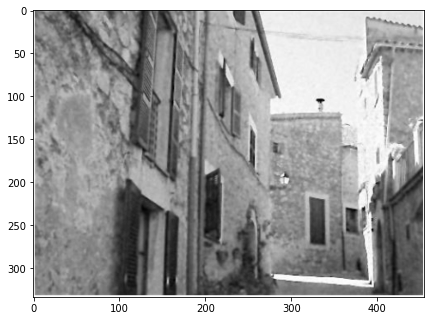

In [4]:
# Cargar imagen.
img = cv2.imread('Datasets/img.PNG')

# Imagen a escala de grises.
img = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

# Obtener forma de la imagen.
height, width = img.shape

# En valores de 0-1.
img_gray = np.zeros((height, width), dtype="float32")
img_gray = img/255

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(img_gray, cmap="gray")
plt.show()

## Integral image

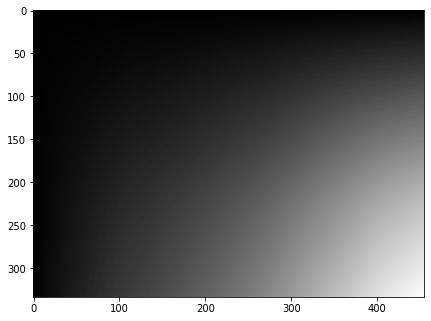

In [5]:
# Obtener imagen integral.
integral_img = getIntegralImage(img_gray)

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(integral_img, cmap="gray")
plt.show()

## Patches

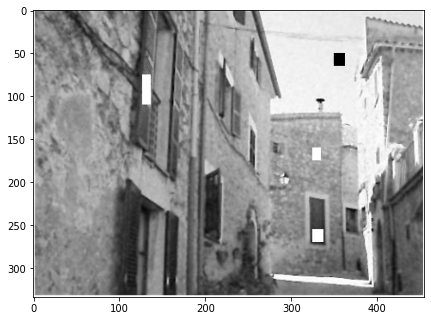

In [6]:
# Lista para guardar los parches.
patches = []

# Imagen para visualizar dónde se pusieron los parches.
patches_img = img_gray.copy()

# Parches.
x, y = 325, 255
patches.append(img_gray[y: y + 15, x: x + 13].copy())
patches_img[y: y + 15, x: x + 13] = 1

x, y = 350, 50
patches.append(img_gray[y: y + 15, x: x + 13].copy())
patches_img[y: y + 15, x: x + 13] = 0

x, y = 127, 75
patches.append(img_gray[y: y + 35, x: x + 10].copy())
patches_img[y: y + 35, x: x + 10] = 1

x, y = 325, 160
patches.append(img_gray[y: y + 15, x: x + 10].copy())
patches_img[y: y + 15, x: x + 10] = 1


# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(patches_img, cmap="gray")
plt.show()

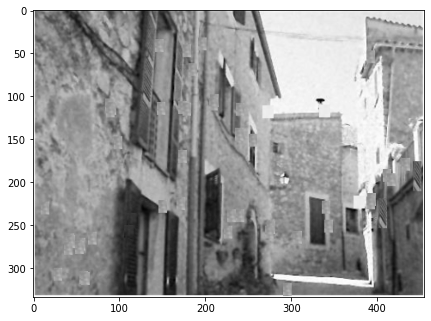

In [7]:
# Encontrar parches.
patch_img = findPatches(img_gray, patches, integral_img)

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(patch_img, cmap="gray")
plt.show()